<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Marc Spiegelman</td>
</table>

In [54]:
%matplotlib inline
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


# Total Least Squares

**GOAL:** Demonstrate the use of the SVD to calculate total least squares regression and compare it to the classical least squares problem that assumes only errors in y.

## Random data: 

We start by constructing a random data set that approximates a straight line but has random errors in both x and y coordinates

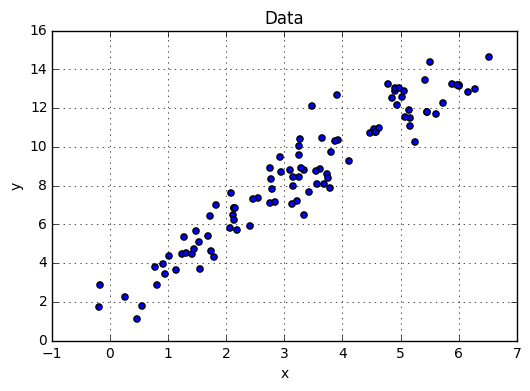

In [55]:
# npoints uniformly randomly distributed points in the interval [0,3]
npnts =100
x = np.random.uniform(0.,3.,npnts)

# set y = mx + b plus random noise of size err
slope = 2.
intercept = 1.
err = .5

y = slope*x + intercept 
y += np.random.normal(loc=y,scale=err)

# add some random noise to x variable as well
x += np.random.normal(loc=x,scale=err)

# And plot out the data
plt.figure()
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.grid()
plt.show()

### Classical Least Squares:  

We first calculate the best fit straight line assuming all the error is in the y variable using the a QR decomposition of the Vandermonde matrix [ 1 x ]

In [56]:
# Vandermonde matrix
A = np.array([ np.ones(x.shape), x]).T

# solve  Ac = y using the QR decomposition via scipy
c_ls,res,rank,s = la.lstsq(A,y)
print 'Best fit Linear Least Squares:'
print '    slope={}'.format(c_ls[1])
print '    intercept={}'.format(c_ls[0])


Best fit Linear Least Squares:
    slope=1.92261653148
    intercept=2.19105261661


### Total Least Squares:  

We now use the SVD to decompose the demeaned data matrix into its principal components

In [57]:
# Data matrix
X = np.array([ x , y]).T
X_mean = np.mean(X,0)
print  'Mean of data matrix=',X_mean

# de-mean the data matrix
X -= X_mean

# now calculate the SVD of the de-meaned data matrix
U,S,VT = la.svd(X,full_matrices=False)
V = VT.T
print 'Singular values=', S
print 'First Right singular vector V=', V[:,0]


Mean of data matrix= [ 3.29348732  8.52316578]
Singular values= [ 36.98756712   4.53905752]
First Right singular vector V= [ 0.43344936  0.90117792]


Now plot and compare the two solutions


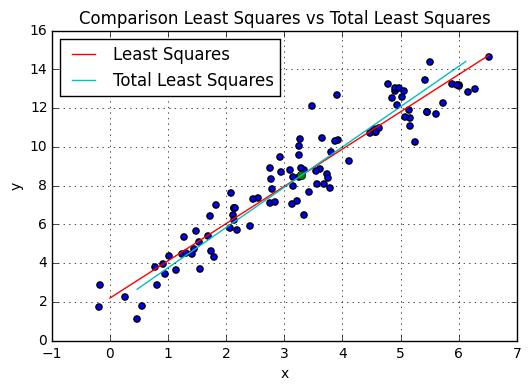

In [58]:
# dummy variables 
t_ls = np.linspace(0,x.max())
t_svd =  2*(t_ls - np.mean(t_ls))

# make figure
plt.figure()
# plot data
plt.scatter(x,y)
# plot the least squares solution
plt.plot(t_ls,c_ls[0]+t_ls*c_ls[1],'r-',label='Least Squares')

# plot the total least Squares solution
# plot the mean
plt.plot(X_mean[0],X_mean[1],'go')
# calculate a line through the mean with the first principal component as a basis
L_tls = X_mean + np.outer(t_svd,V[:,0])
plt.plot(L_tls[:,0],L_tls[:,1],'c-',label='Total Least Squares')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison Least Squares vs Total Least Squares')
plt.legend(loc='best')
plt.grid()
plt.show()